In [1]:
import pandas as pd
df = pd.read_csv('Datasets/matches.csv')
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [2]:
match = pd.read_csv('Datasets/matches.csv')
delivery = pd.read_csv('Datasets/deliveries.csv')

In [3]:
match.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
match.shape

(1095, 20)

In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [6]:
total_score_df = delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

In [7]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [8]:
total_score_df

,match_id,inning,total_runs
0,335982,1,222
2,335983,1,240
4,335984,1,129
6,335985,1,165
8,335986,1,110
...,...,...,...
2207,1426307,1,214
2209,1426309,1,159
2211,1426310,1,172
2213,1426311,1,175


In [9]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [10]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,...,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,...,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,...,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,...,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,...,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,...,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,...,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,...,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,...,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [11]:
match_df['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [12]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals', 
    'Lucknow Super Giants', 
    'Gujarat Titans'
]

In [13]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [14]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [15]:
match_df.shape

(911, 22)

In [16]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [17]:
delivery_df = match_df.merge(delivery,on='match_id')

In [18]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [19]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,AB Dinda,R Dravid,0,1,1,wides,0,NaN,NaN,NaN
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,AB Dinda,R Dravid,0,0,0,NaN,0,NaN,NaN,NaN
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,AB Dinda,R Dravid,1,0,1,NaN,0,NaN,NaN,NaN
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,AB Dinda,W Jaffer,1,0,1,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217205,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
217206,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
217207,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
217208,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


In [20]:
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [21]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [22]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [23]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,1,221,125
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,1,wides,0,NaN,NaN,NaN,2,220,124
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,0,NaN,0,NaN,NaN,NaN,2,220,123
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,0,1,NaN,0,NaN,NaN,NaN,3,219,122
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,0,1,NaN,0,NaN,NaN,NaN,4,218,121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217205,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,110,3,67
217206,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,111,2,66
217207,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,...,0,1,NaN,0,NaN,NaN,NaN,112,1,65
217208,1426312,Chennai,Kolkata Knight Riders,113,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,...,0,1,NaN,0,NaN,NaN,NaN,113,0,64


In [24]:
# Convert 'player_dismissed' to numeric and replace '0' with 0
delivery_df['player_dismissed'] = pd.to_numeric(delivery_df['player_dismissed'], errors='coerce').fillna(0).astype(int)

# Calculate the cumulative sum of 'player_dismissed' within each group
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

# Calculate the number of wickets remaining in each match
delivery_df['wickets'] = 10 - wickets

# Check the first few rows of the DataFrame
print(delivery_df.head())

     match_id       city                 winner  total_runs_x  inning  \
124    335982  Bangalore  Kolkata Knight Riders           222       2   
125    335982  Bangalore  Kolkata Knight Riders           222       2   
126    335982  Bangalore  Kolkata Knight Riders           222       2   
127    335982  Bangalore  Kolkata Knight Riders           222       2   
128    335982  Bangalore  Kolkata Knight Riders           222       2   

                    batting_team           bowling_team  over  ball    batter  \
124  Royal Challengers Bangalore  Kolkata Knight Riders     0     1  R Dravid   
125  Royal Challengers Bangalore  Kolkata Knight Riders     0     2  W Jaffer   
126  Royal Challengers Bangalore  Kolkata Knight Riders     0     3  W Jaffer   
127  Royal Challengers Bangalore  Kolkata Knight Riders     0     4  W Jaffer   
128  Royal Challengers Bangalore  Kolkata Knight Riders     0     5  R Dravid   

     ... total_runs_y extras_type  is_wicket  player_dismissed  \
124  ...

In [25]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batter,...,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
124,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,1,R Dravid,...,1,NaN,0,0,NaN,NaN,1,221,125,10
125,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,2,W Jaffer,...,1,wides,0,0,NaN,NaN,2,220,124,10
126,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,3,W Jaffer,...,0,NaN,0,0,NaN,NaN,2,220,123,10
127,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,4,W Jaffer,...,1,NaN,0,0,NaN,NaN,3,219,122,10
128,335982,Bangalore,Kolkata Knight Riders,222,2,Royal Challengers Bangalore,Kolkata Knight Riders,0,5,R Dravid,...,1,NaN,0,0,NaN,NaN,4,218,121,10


In [26]:
# Calculate CRR (Current Run Rate) with bounds
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])
delivery_df['crr'] = delivery_df['crr'].clip(lower=0, upper=40)  # Limit CRR between 0 and 40

In [27]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [28]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [29]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [30]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [31]:
final_df = final_df.sample(final_df.shape[0])

In [32]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
185944,Gujarat Titans,Royal Challengers Bangalore,Mumbai,57,36,10,170,8.071429,9.5,1


In [33]:
final_df.dropna(inplace=True)

In [34]:
final_df = final_df[final_df['balls_left'] != 0]

In [35]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [36]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
134109,Royal Challengers Bangalore,Delhi Daredevils,Delhi,86,66,10,181,10.555556,7.818182
188850,Lucknow Super Giants,Gujarat Titans,Pune,76,52,10,144,6.000000,8.769231
87502,Chennai Super Kings,Kings XI Punjab,Cuttack,226,123,10,231,0.000000,11.024390
112613,Kings XI Punjab,Kolkata Knight Riders,Kolkata,116,77,10,164,6.697674,9.038961
181253,Kolkata Knight Riders,Delhi Capitals,Mumbai,172,92,10,215,9.214286,11.217391
...,...,...,...,...,...,...,...,...,...
46581,Rajasthan Royals,Mumbai Indians,Jaipur,48,65,10,94,5.018182,4.430769
130077,Rajasthan Royals,Sunrisers Hyderabad,Jaipur,23,15,10,151,7.314286,9.200000
21920,Royal Challengers Bangalore,Mumbai Indians,Port Elizabeth,82,53,10,157,6.716418,9.283019
146677,Delhi Capitals,Kings XI Punjab,Delhi,44,39,10,163,8.814815,6.769231


In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
], remainder='passthrough')

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [39]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [40]:
pipe.fit(X_train,y_train)

C:\Users\as427\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\compose\_column_transformer.py:1667: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [41]:
y_pred = pipe.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7957871284622006

In [43]:
pipe.predict_proba(X_test)[10]

array([0.55161668, 0.44838332])

In [44]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [45]:
import numpy as np

In [46]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [47]:
temp_df,target = match_progression(delivery_df,336009,pipe)
temp_df

Target- 187


,end_of_over,runs_after_over,wickets_in_over,lose,win
6499,1,9,0,35.3,64.7
6505,2,15,0,28.3,71.7
6511,3,4,0,35.3,64.7
6517,4,6,0,39.3,60.7
6523,5,7,0,42.0,58.0
6530,6,17,0,28.6,71.4
6537,7,13,0,22.3,77.7
6543,8,12,0,17.7,82.3
6551,9,12,0,13.6,86.4
6557,10,3,0,19.1,80.9


Text(0.5, 1.0, 'Target-187')

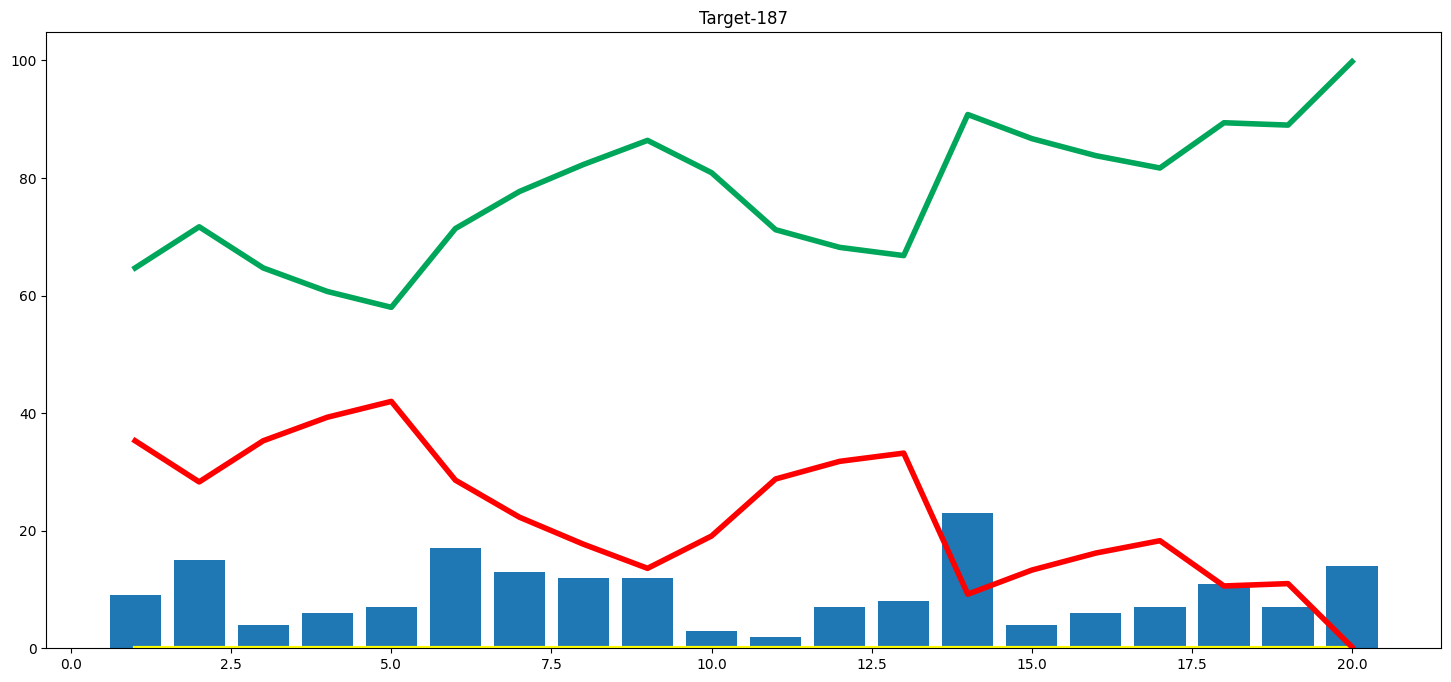

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [49]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals',
 'Lucknow Super Giants',
 'Gujarat Titans']

In [50]:
# Get unique venues
venues = match['venue'].unique()

print("\nIPL Venues:")
for venue in sorted(venues):
    print(f"- {venue}")


IPL Venues:
- Arun Jaitley Stadium
- Arun Jaitley Stadium, Delhi
- Barabati Stadium
- Barsapara Cricket Stadium, Guwahati
- Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow
- Brabourne Stadium
- Brabourne Stadium, Mumbai
- Buffalo Park
- De Beers Diamond Oval
- Dr DY Patil Sports Academy
- Dr DY Patil Sports Academy, Mumbai
- Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium
- Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam
- Dubai International Cricket Stadium
- Eden Gardens
- Eden Gardens, Kolkata
- Feroz Shah Kotla
- Green Park
- Himachal Pradesh Cricket Association Stadium
- Himachal Pradesh Cricket Association Stadium, Dharamsala
- Holkar Cricket Stadium
- JSCA International Stadium Complex
- Kingsmead
- M Chinnaswamy Stadium
- M Chinnaswamy Stadium, Bengaluru
- M.Chinnaswamy Stadium
- MA Chidambaram Stadium
- MA Chidambaram Stadium, Chepauk
- MA Chidambaram Stadium, Chepauk, Chennai
- Maharaja Yadavindra Singh International Cricket Stadi

In [51]:
delivery_df['city'].unique()

array(['Bangalore', 'Chandigarh', 'Delhi', 'Mumbai', 'Kolkata', 'Jaipur',
       'Hyderabad', 'Chennai', 'Cape Town', 'Port Elizabeth', 'Durban',
       'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi', nan,
       'Bengaluru', 'Indore', 'Dubai', 'Sharjah', 'Navi Mumbai',
       'Lucknow', 'Guwahati'], dtype=object)

In [52]:
# Import pandas library

# Create a dictionary to store team statistics
team_stats = {}

# Get all unique teams from both team1 and team2 columns
all_teams = pd.concat([df['team1'], df['team2']]).unique()

# Calculate wins and losses for each team
for team in all_teams:
    # Count wins
    wins = len(df[df['winner'] == team])
    
    # Count total matches played
    matches_played = len(df[(df['team1'] == team) | (df['team2'] == team)])
    
    # Calculate losses (matches played minus wins)
    losses = matches_played - wins
    
    # Store in dictionary
    team_stats[team] = {'Matches': matches_played, 'Wins': wins, 'Losses': losses}

# Create a formatted display
print("\nTeam Performance Analysis")
print("-" * 70)
print(f"{'Team':<30} {'Matches':<10} {'Wins':<10} {'Losses':<10} {'Win %':<10}")
print("-" * 70)

for team, stats in team_stats.items():
    win_percentage = (stats['Wins'] / stats['Matches']) * 100
    print(f"{team:<30} {stats['Matches']:<10} {stats['Wins']:<10} {stats['Losses']:<10} {win_percentage:.2f}%")


Team Performance Analysis
----------------------------------------------------------------------
Team                           Matches    Wins       Losses     Win %     
----------------------------------------------------------------------
Royal Challengers Bangalore    240        116        124        48.33%
Kings XI Punjab                190        88         102        46.32%
Delhi Daredevils               161        67         94         41.61%
Mumbai Indians                 261        144        117        55.17%
Kolkata Knight Riders          251        131        120        52.19%
Rajasthan Royals               221        112        109        50.68%
Deccan Chargers                75         29         46         38.67%
Chennai Super Kings            238        138        100        57.98%
Kochi Tuskers Kerala           14         6          8          42.86%
Pune Warriors                  46         12         34         26.09%
Sunrisers Hyderabad            182        88  

In [53]:
def analyze_head_to_head(team1, team2):
    # Get matches between these two teams
    matches = df[((df['team1'] == team1) & (df['team2'] == team2)) | 
                ((df['team1'] == team2) & (df['team2'] == team1))]
    
    # Count total matches between them
    total_matches = len(matches)
    
    # Count wins for each team
    team1_wins = len(matches[matches['winner'] == team1])
    team2_wins = len(matches[matches['winner'] == team2])
    
    # Print results
    print(f"\nHead to Head: {team1} vs {team2}")
    print("-" * 50)
    print(f"Total Matches Played: {total_matches}")
    print(f"{team1} Wins: {team1_wins}")
    print(f"{team2} Wins: {team2_wins}")
    print(f"{team1} Win Rate: {(team1_wins/total_matches)*100:.2f}%")
    print(f"{team2} Win Rate: {(team2_wins/total_matches)*100:.2f}%")

# Print all available teams
print("Available Teams:")
for i, team in enumerate(all_teams, 1):
    print(f"{i}. {team}")

# Example usage (you can change these team names)
team1 = "Mumbai Indians"
team2 = "Chennai Super Kings"
analyze_head_to_head(team1, team2)

Available Teams:
1. Royal Challengers Bangalore
2. Kings XI Punjab
3. Delhi Daredevils
4. Mumbai Indians
5. Kolkata Knight Riders
6. Rajasthan Royals
7. Deccan Chargers
8. Chennai Super Kings
9. Kochi Tuskers Kerala
10. Pune Warriors
11. Sunrisers Hyderabad
12. Gujarat Lions
13. Rising Pune Supergiants
14. Rising Pune Supergiant
15. Delhi Capitals
16. Punjab Kings
17. Lucknow Super Giants
18. Gujarat Titans
19. Royal Challengers Bengaluru

Head to Head: Mumbai Indians vs Chennai Super Kings
--------------------------------------------------
Total Matches Played: 37
Mumbai Indians Wins: 20
Chennai Super Kings Wins: 17
Mumbai Indians Win Rate: 54.05%
Chennai Super Kings Win Rate: 45.95%


In [54]:
import pickle
pickle.dump(pipe, open('models/pipe.pkl', 'wb'))